# Análisis del SMP

Este análisis de datos inicial permite ver **distribuciones de frecuencias** muy útiles para una primera exploración.

- Muestra información del SMP de los últimos **12 meses** para la zona de **4302 - BM5Z2**, sólo APP, APE y APF. En total son **10.290** paradas.

Para un modelo de mantenimiento predictivo es información necesaria pero no suficiente.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetics for the plots (optional)
sns.set(style="whitegrid")


In [3]:
# Load the dataset
df = pd.read_csv('C:\\Users\\pm24641\\OneDrive - Alliance\\Recursos PF\\SMP.csv')
df['Duration']=df['Duration'] / 100

# Resumen de Datos

A continuación se muestra información sobre la duración total entre todas las paradas.

- Se muestra una tabla con las **10 paradas más largas del período**.
- Se ve un *outlier*. **Una parada duró** 3.822,28 minutos, o **65 horas**.

In [4]:
total_duration = df['Duration'].sum()
total_duration_h = total_duration / 60
print("Zona:  4302 - BM5Z2")
print(f'Duración de todas las paradas en los últimos 12 meses: {total_duration:.2f} minutos, o {total_duration_h:.2f} horas')

top= 10
# Sort the DataFrame by the "Duration" column in descending order and select the top 5 rows
top_stops = df.nlargest(top, 'Duration')
# Specify the columns you want to display
columns_to_display = [
    'Horodate', 'Type', 'Duration', 'Module', 'Fine location', 'Stop cause',
    'Comment', 'Origin type', 'Event', 'Stops family', 'Stops under-family'
]

# Select only the specified columns
top_stops = top_stops[columns_to_display]

print(f"Top {top} paradas por duración:")
display(top_stops.style.set_table_attributes('style="font-size: 12px; width:100%"')
                      .bar(subset=['Duration'], color='#d65f5f').format({'Duration': "{:.2f}"}))




Zona:  4302 - BM5Z2
Duración de todas las paradas en los últimos 12 meses: 43102.57 minutos, o 718.38 horas
Top 10 paradas por duración:


,Horodate,Type,Duration,Module,Fine location,Stop cause,Comment,Origin type,Event,Stops family,Stops under-family
2634,2023-12-22 22:36:00,APP,3822.28,12 - U2RB_ARC - U2 Robot de Sold. Arco,nan,DEFECTO PRESENCIA AIRE,nan,APP,DEFECTO PRESENCIA AIRE,nan,nan
860,2024-04-11 08:11:58,APE,361.87,0 - COM1 - GLOBAL ZONE,nan,Z2: Pérdida marcha ciclo zona,nan,APE,Z2: Pérdida marcha ciclo zona,nan,nan
145,2024-04-24 22:26:08,APE,246.42,16 - U6RB_ARC - U6 Robot de Sold. Arco,Antorcha 1,Otra Parada de explotacion,def abierto . fin de produc,APP,Z2: U6 Sobrepasamiento tiempo de ciclo,PARADA GEN. Y EXPLOTACION,PARADA EXPLOTACION
2449,2024-02-22 16:28:58,APE,233.87,13 - U3RB_ARC - U3 Robot de Sold. Arco,Conjunto Sold. arco,Otra Parada de explotacion,nan,APP,ARC : DEFAUT PRESENCE ARC,PARADA GEN. Y EXPLOTACION,PARADA EXPLOTACION
153,2024-04-24 21:04:15,APE,226.17,12 - U2RB_ARC - U2 Robot de Sold. Arco,Conjunto Sold. arco,Otra Parada de explotacion,Defecto cordon de soldadura.,APP,ARC : DEFAUT SOUDURE ARC,PARADA GEN. Y EXPLOTACION,PARADA EXPLOTACION
2694,2023-12-21 12:50:34,APP,207.73,16 - U6RB_ARC - U6 Robot de Sold. Arco,ARC,TENTATIVE MAXIMUM D AMORCAGE DEPASSE,nan,APP,ARC : TENTATIVE MAXIMUM D AMORCAGE DEPASSE,nan,nan
9804,2023-04-18 18:05:13,APE,193.27,13 - U3RB_ARC - U3 Robot de Sold. Arco,General Ejes,Otra Parada de explotacion,colision de torcha con carroc,APP,ARC : DEFAUT PRESENCE ARC,PARADA GEN. Y EXPLOTACION,PARADA EXPLOTACION
858,2024-04-11 08:52:13,APE,189.12,0 - COM1 - GLOBAL ZONE,nan,Z2: Pérdida marcha ciclo zona,nan,APE,Z2: Pérdida marcha ciclo zona,nan,nan
9320,2023-05-09 08:16:05,APF,182.73,10 - U0 - U0 mesa de rolos,Conjunto control visión,Otra Parada mantenimiento,defecto FM2,APP,Z2: U0 Def. Mesa de rolos,Parada FUNCIONALES,MANTENIMIENTO
588,2024-04-17 20:11:33,APE,181.92,15 - U5RB_ARC - U5 Robot de Sold. Arco,Conjunto Sold. arco,Otra Parada de explotacion,def de soldadura,APP,ARC : DEFAUT SOUDURE ARC,PARADA GEN. Y EXPLOTACION,PARADA EXPLOTACION


# Histograma

Para entender cómo se distribuyen las paradas, podemos hacer un histograma. 
Se muestra en escala logarítimica, y resumidamente se observa que **la mayoría de paradas (7.981) tuvieron un impacto de entre 0,001 (0,06 segundos) y 0,01 minutos (0,6 segundos)**.

Luego se observa otro pico a los **10 minutos**. En total hay **1.559** paradas **entre 10 y 100 minutos**, y quedan **26 de más de 100 minutos**.

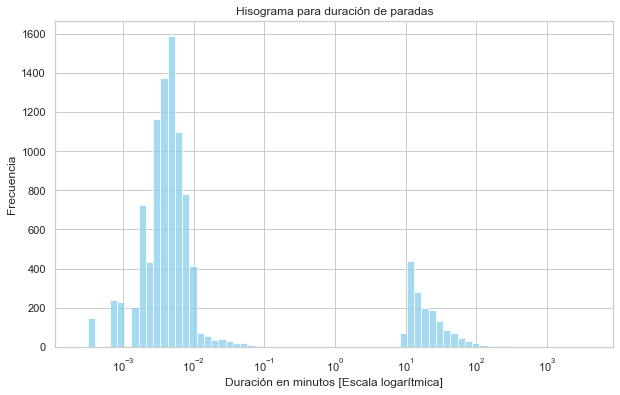

In [5]:
# Plot the distribution of 'Duration'
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Duration'] <20000]['Duration'], kde=False, bins=70,log_scale=True, color='skyblue')
plt.title('Hisograma para duración de paradas')
plt.xlabel('Duración en minutos [Escala logarítmica]')
plt.ylabel('Frecuencia')
plt.show()

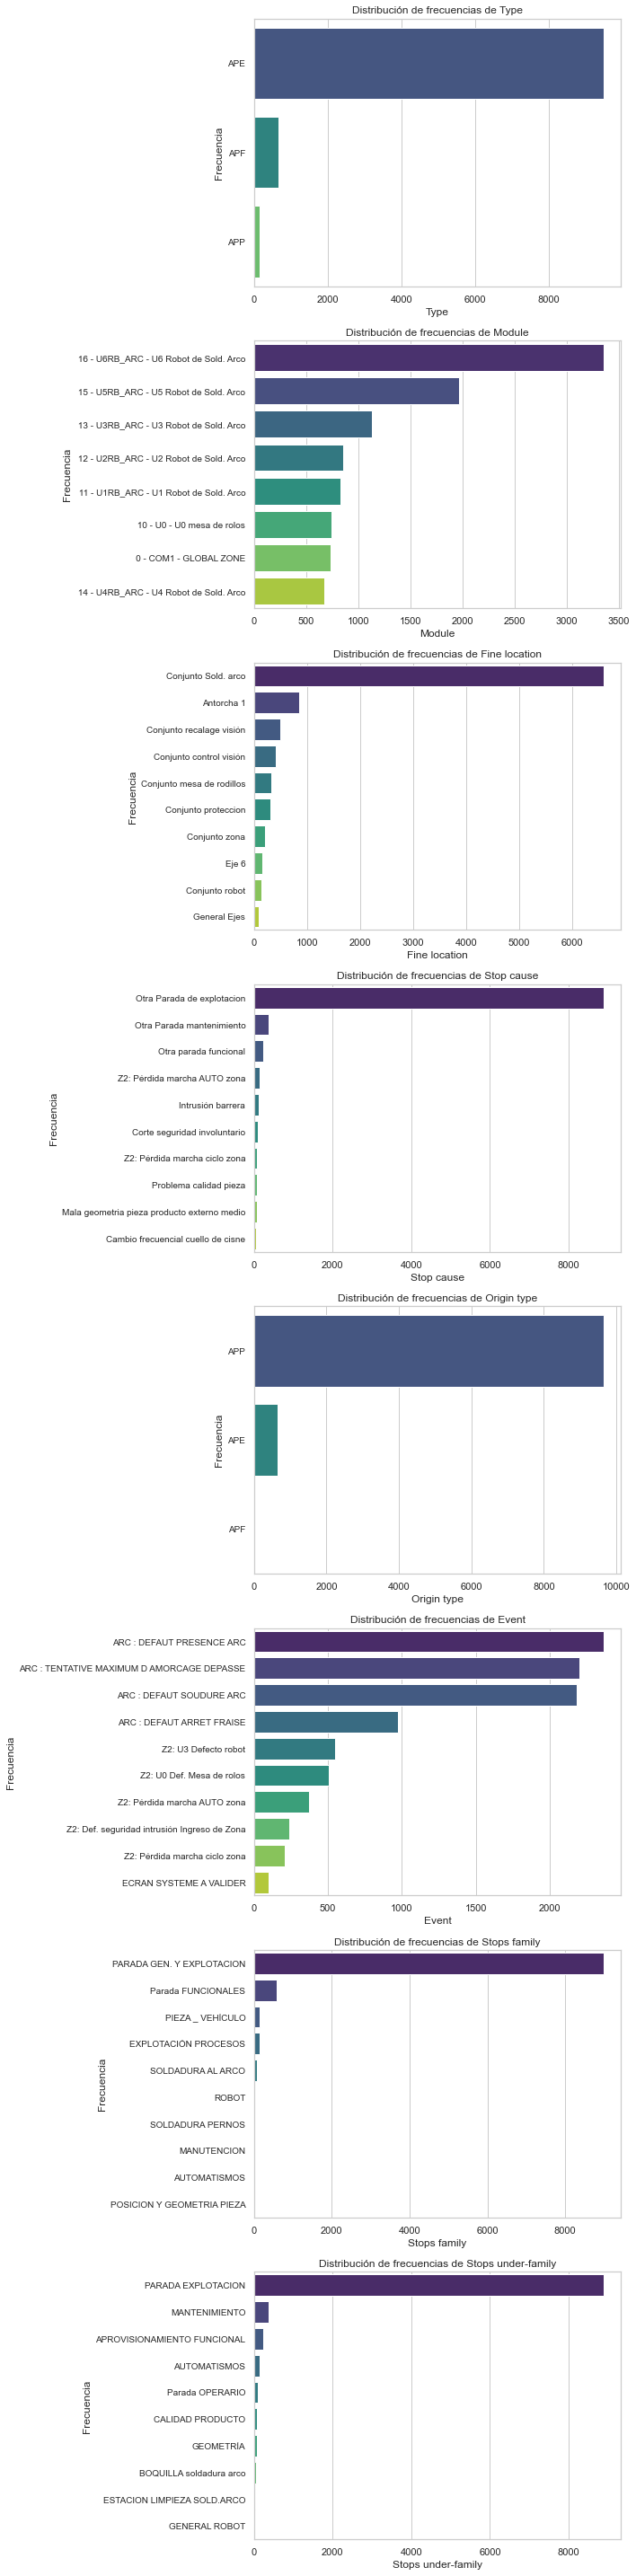

In [6]:
columns_to_plot = ['Type', 'Module', 'Fine location', 'Stop cause', 'Origin type', 'Event', 'Stops family', 'Stops under-family']

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 5 * len(columns_to_plot)))

# Check if there's only one plot to adjust indexing
if len(columns_to_plot) == 1:
    axes = [axes]

# Loop through the list of columns and create a bar plot for each
for i, col in enumerate(columns_to_plot):
    # Count the occurrences of each unique value in the column
    data = df[col].value_counts().nlargest(10)
    # Create bar plot
    sns.barplot(x=data.values, y=data.index, ax=axes[i], palette='viridis', orient='h')
    axes[i].set_title(f'Distribución de frecuencias de {col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel(f'{col}')
    # Improve layout for long labels
    axes[i].tick_params(axis='y', which='major', labelsize=10)
    plt.subplots_adjust(left=0.3)  # Adjust this value based on your label lengths

# Adjust layout
plt.tight_layout()
plt.show()